<a href="https://colab.research.google.com/github/mH-13/Machine-Learning-and-AI/blob/main/Predicting_feels_like_in_Celsius_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A DS project demonstrating Data Cleaning, EDA, Feature Extraction, Data Modeling, and Data Visualization implementations

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


Data Cleaning

In [ ]:
df=pd.read_csv('bangladesh_weatherReport.csv')

num_rows, num_columns = df.shape
'''
column_names = df.columns
print("Column names:")
for column in column_names:
    print(column)
'''
columns_to_drop = ['country', 'location_name', 'latitude','timezone','longitude','last_updated_epoch','last_updated','temperature_fahrenheit',
                   'wind_kph','wind_degree','wind_direction','pressure_mb','precip_in','feels_like_fahrenheit','visibility_km','visibility_miles',
                   'gust_kph','sunrise','sunset','moonrise','moonset','moon_phase'
                   ,'moon_illumination','uv_index','pressure_in']

In [ ]:
df = df.drop(columns=columns_to_drop)
df.to_csv('modified_dataset.csv', index=False)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)
column_names = df.columns

Number of rows: 216
Number of columns: 41


Checking the missing valuse

In [ ]:
missing_values = df.isna().sum()

print("Missing values:")
print(missing_values)

Missing values:
temperature_celsius             0
condition_text                  0
wind_mph                        0
precip_mm                       0
humidity                        0
cloud                           0
feels_like_celsius              0
gust_mph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
dtype: int64


<Axes: >

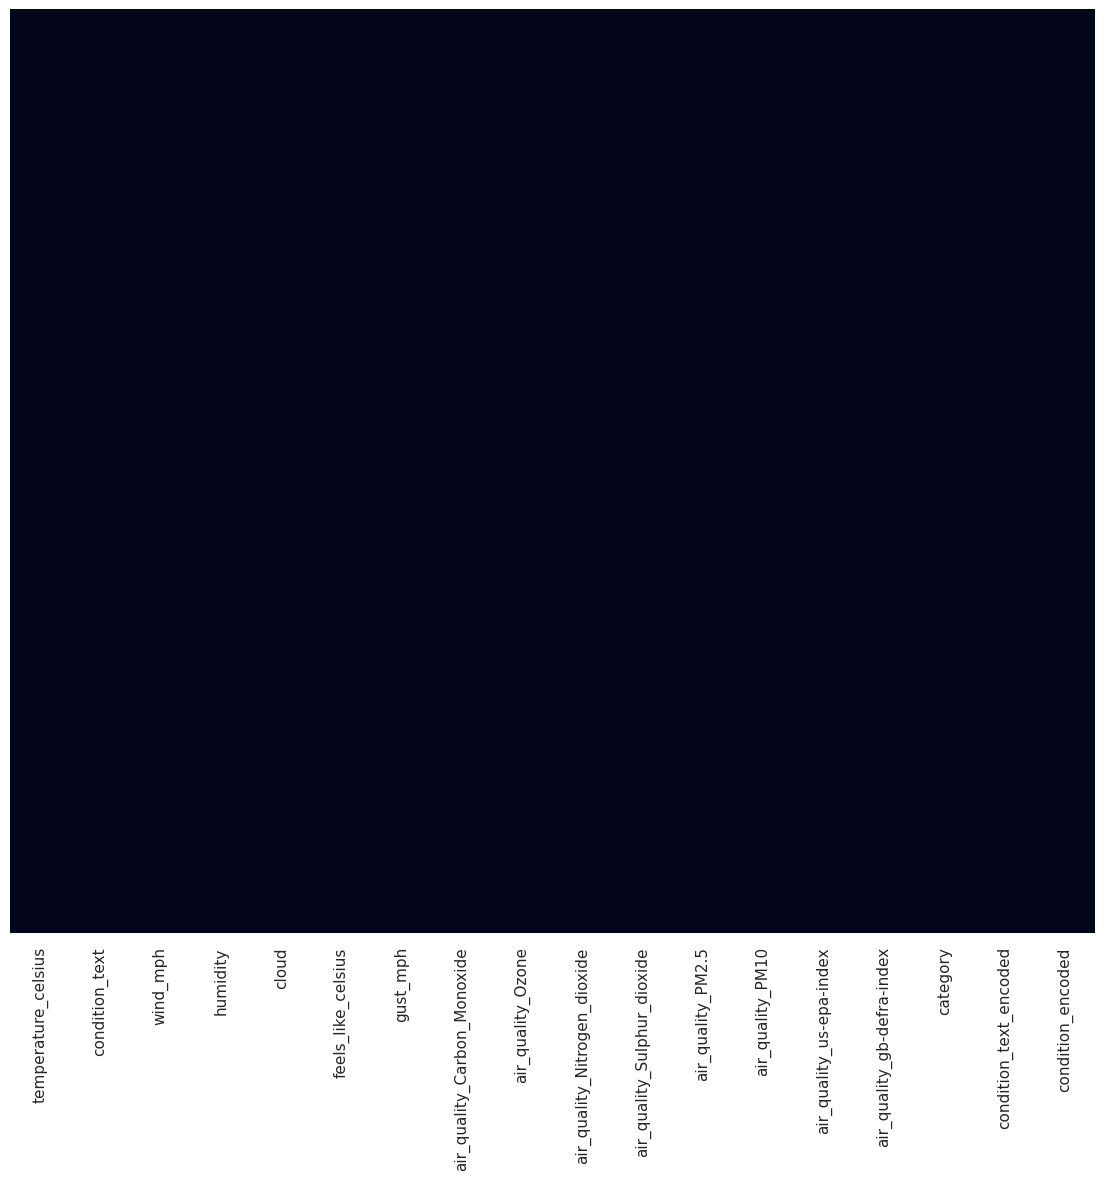

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Checking the duplicate values

In [ ]:
duplicate_rows = df[df.duplicated()]

print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [temperature_celsius, condition_text, wind_mph, precip_mm, humidity, cloud, feels_like_celsius, gust_mph, air_quality_Carbon_Monoxide, air_quality_Ozone, air_quality_Nitrogen_dioxide, air_quality_Sulphur_dioxide, air_quality_PM2.5, air_quality_PM10, air_quality_us-epa-index, air_quality_gb-defra-index]
Index: []


In [ ]:
print(df['condition_text'].describe())

count       216
unique       16
top       Clear
freq         93
Name: condition_text, dtype: object


In [ ]:
null_values_count = df.isna().sum()


print("Number of null values in each column:")
print(null_values_count)

Number of null values in each column:
temperature_celsius             0
condition_text                  0
wind_mph                        0
precip_mm                       0
humidity                        0
cloud                           0
feels_like_celsius              0
gust_mph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
dtype: int64


In [ ]:
target_value = 0
zero_count_per_column = (df.eq(target_value)).sum()
print("Number of {} values in each column:".format(target_value))
print(zero_count_per_column)

columns_to_drop = ['precip_mm']
df = df.drop(columns=columns_to_drop)
df.to_csv('modified_dataset.csv', index=False)

Number of 0 values in each column:
temperature_celsius               0
condition_text                    0
wind_mph                          0
precip_mm                       182
humidity                          0
cloud                            71
feels_like_celsius                0
gust_mph                          0
air_quality_Carbon_Monoxide       0
air_quality_Ozone                31
air_quality_Nitrogen_dioxide      0
air_quality_Sulphur_dioxide       0
air_quality_PM2.5                 0
air_quality_PM10                  0
air_quality_us-epa-index          0
air_quality_gb-defra-index        0
dtype: int64


In [ ]:
column_names = df.columns
print("remaining Column names after dropping precip_mm:")
for column in column_names:
    print(column)


remaining Column names after dropping precip_mm:
temperature_celsius
condition_text
wind_mph
humidity
cloud
feels_like_celsius
gust_mph
air_quality_Carbon_Monoxide
air_quality_Ozone
air_quality_Nitrogen_dioxide
air_quality_Sulphur_dioxide
air_quality_PM2.5
air_quality_PM10
air_quality_us-epa-index
air_quality_gb-defra-index


In [ ]:
unique_values_count = df['condition_text'].nunique()
print("Number of unique values in column '{}': {}".format('condition_text', unique_values_count))
unique_values = df['condition_text'].unique()
print("Unique values in column '{}':".format('condition_text'))
for value in unique_values:
    print(value)


column_name = 'air_quality_PM10'


bins = [0, 50, 100, 150, 200, 300, 600]
labels = [1, 2, 3, 4, 5, 6]

df['category'] = pd.cut(df[column_name], bins=bins, labels=labels, right=False)

Number of unique values in column 'condition_text': 16
Unique values in column 'condition_text':
Cloudy
Sunny
Partly cloudy
Patchy rain possible
Light rain shower
Overcast
Thundery outbreaks possible
Moderate rain
Patchy light rain
Moderate or heavy rain shower
Clear
Mist
Clear 
Patchy rain nearby
Cloudy 
Partly Cloudy 


In [ ]:
column_name = 'condition_text'


label_encoder = LabelEncoder()


df[column_name + '_encoded'] = label_encoder.fit_transform(df[column_name])

print("Unique encoded values in column '{}':".format(column_name))
print(df[column_name + '_encoded'].unique())

Unique encoded values in column 'condition_text':
[ 2 14 10 13  4  8 15  7 11  6  0  5  1 12  3  9]


In [ ]:

numeric_columns = df.select_dtypes(include=['int', 'float']).columns

scaler = StandardScaler()

scaled_values = scaler.fit_transform(df[numeric_columns])


scaled_df = pd.DataFrame(scaled_values, columns=numeric_columns)


for column in df.columns:
    if column not in numeric_columns:
        scaled_df[column] = df[column]

print("_________________--------__________________")
print(scaled_df.head())
scaled_df.to_csv('scaled_dataset.csv', index=False)


_________________--------__________________
   temperature_celsius  wind_mph  humidity     cloud  feels_like_celsius  \
0             2.967544 -0.895392 -0.485213  1.553313            3.003125   
1             2.052306 -1.344127 -0.013350 -0.405521            1.972223   
2             1.783118 -1.231943  0.458513  0.182129            1.892923   
3             1.406256  0.413418  1.087664  1.879786            1.714498   
4             1.513931 -0.484052  0.982806  0.214776            1.833448   

   gust_mph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0 -1.454358                    -0.781819           1.237224   
1 -1.910922                     0.750656          -0.822034   
2 -1.631910                    -0.842670           0.466722   
3  0.143616                    -0.763600           0.778592   
4 -0.896335                    -0.964280           0.480481   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                      1.000748                     0.62

#Histogram for Temperature (°C):

  A histogram to visualize the distribution of temperature in Celsius.

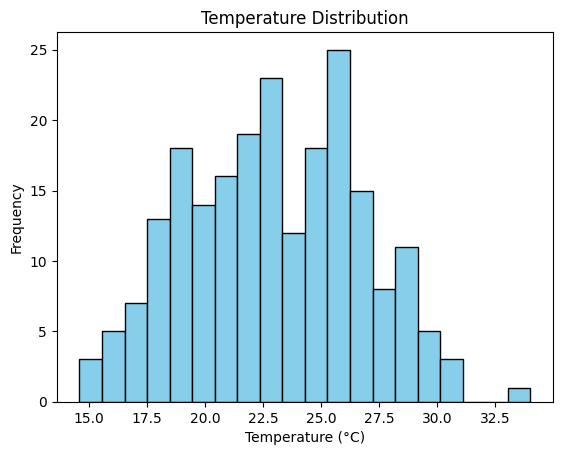

In [ ]:
plt.hist(df['temperature_celsius'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()


#Box Plot for Feels-like Temperature (°C) by Weather Condition

A box plot showing how feels-like temperature varies across different weather conditions.

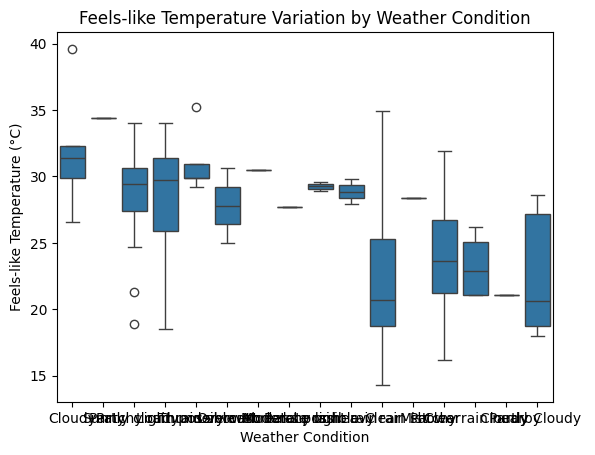

In [ ]:
sns.boxplot(x='condition_text', y='feels_like_celsius', data=df)
plt.xlabel('Weather Condition')
plt.ylabel('Feels-like Temperature (°C)')
plt.title('Feels-like Temperature Variation by Weather Condition')
plt.show()


#Scatter Plot for Wind Speed vs. Gust Speed:

A scatter plot to explore the relationship between wind speed and gust speed.

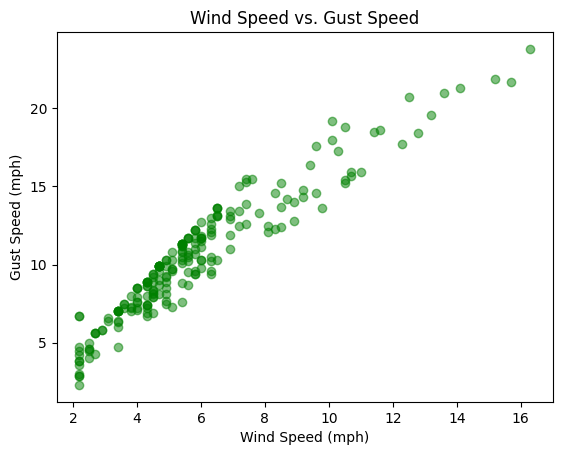

In [ ]:
plt.scatter(df['wind_mph'], df['gust_mph'], alpha=0.5, color='green')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Gust Speed (mph)')
plt.title('Wind Speed vs. Gust Speed')
plt.show()


#Bar Plot for Air Quality Categories

A bar plot showing the distribution of air quality categories.

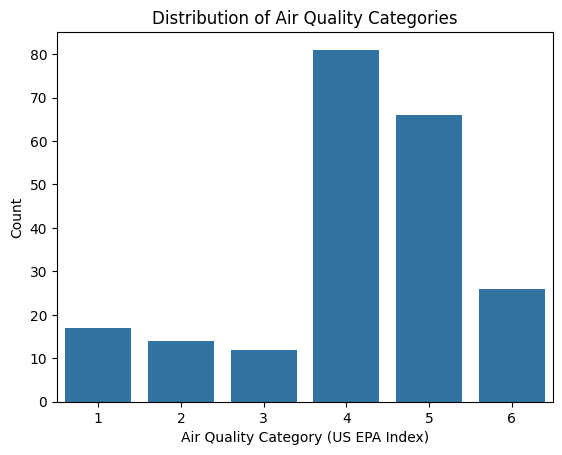

In [ ]:
sns.countplot(x='air_quality_us-epa-index', data=df)
plt.xlabel('Air Quality Category (US EPA Index)')
plt.ylabel('Count')
plt.title('Distribution of Air Quality Categories')
plt.show()


#Correlation Heatmap:

A heatmap to visualize the correlation between numeric variables.

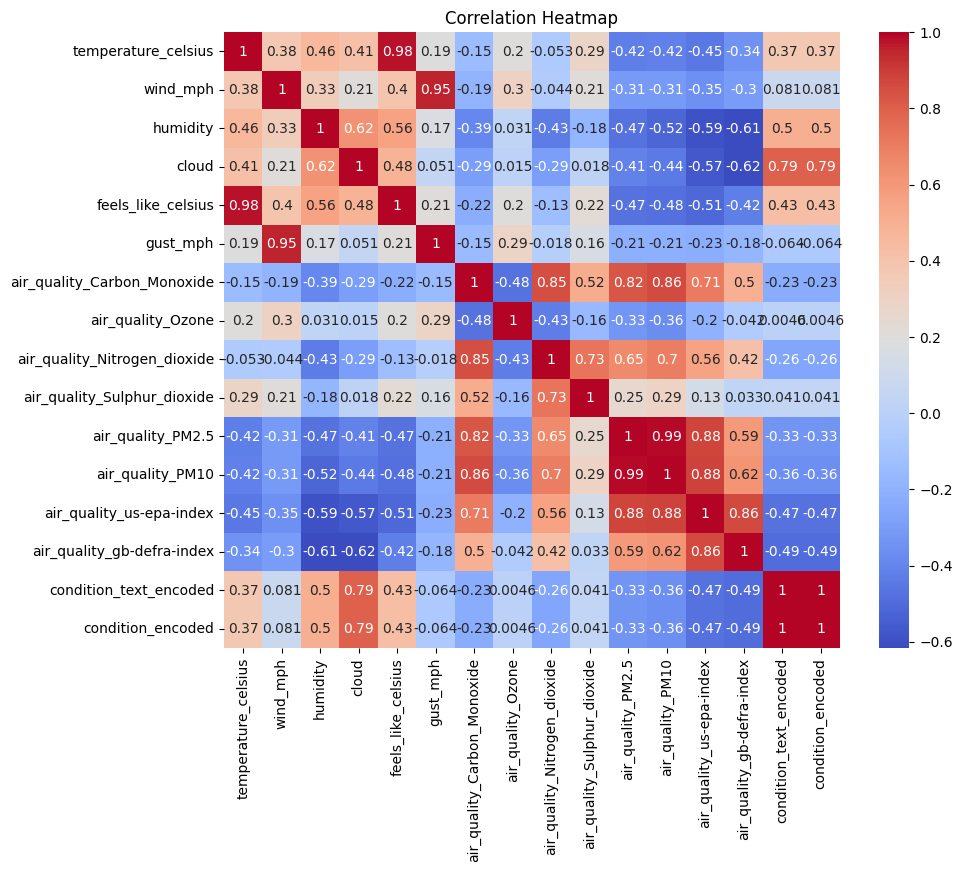

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode 'condition_text' column
label_encoder = LabelEncoder()
df['condition_encoded'] = label_encoder.fit_transform(df['condition_text'])

# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# numerical_columns = scaled_df.select_dtypes(include=[np.number])
# X = numerical_columns.drop(columns=['feels_like_celsius'])
# y = numerical_columns['feels_like_celsius']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #Pearson_Correlation
# numerical_columns = scaled_df.select_dtypes(include=[np.number])
# X = numerical_columns.drop(columns=['feels_like_celsius'])
# y = numerical_columns['feels_like_celsius']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# corr_matrix = X_train.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


threshold = 0.7
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)


<Axes: >

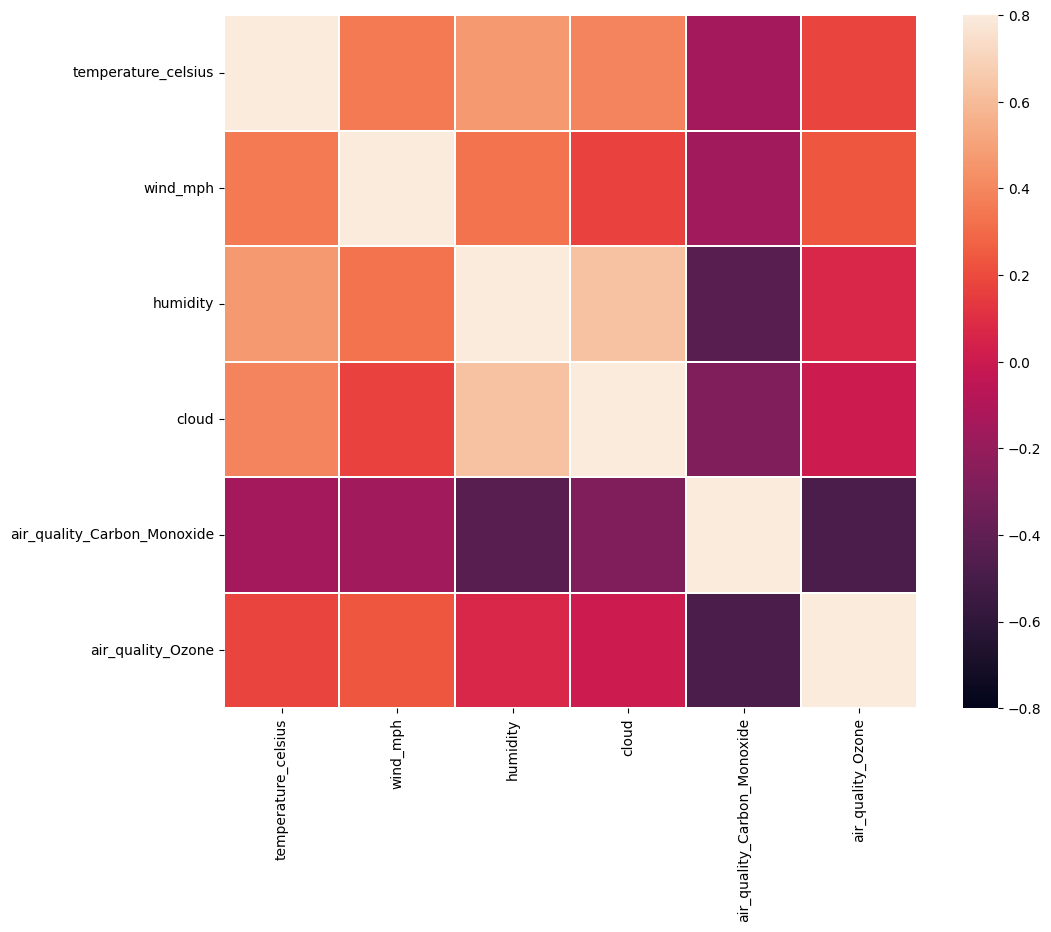

In [ ]:
corr_train = X_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
# Mask the upper part of the heatmap
# mask = np.triu(np.ones_like(corr_train, dtype = bool))
sns.heatmap(corr_train, vmax = .8, vmin = -.8, linewidths = 0.1,
            annot_kws = {"size": 10, "color": "black"}, square = True)

<Axes: >

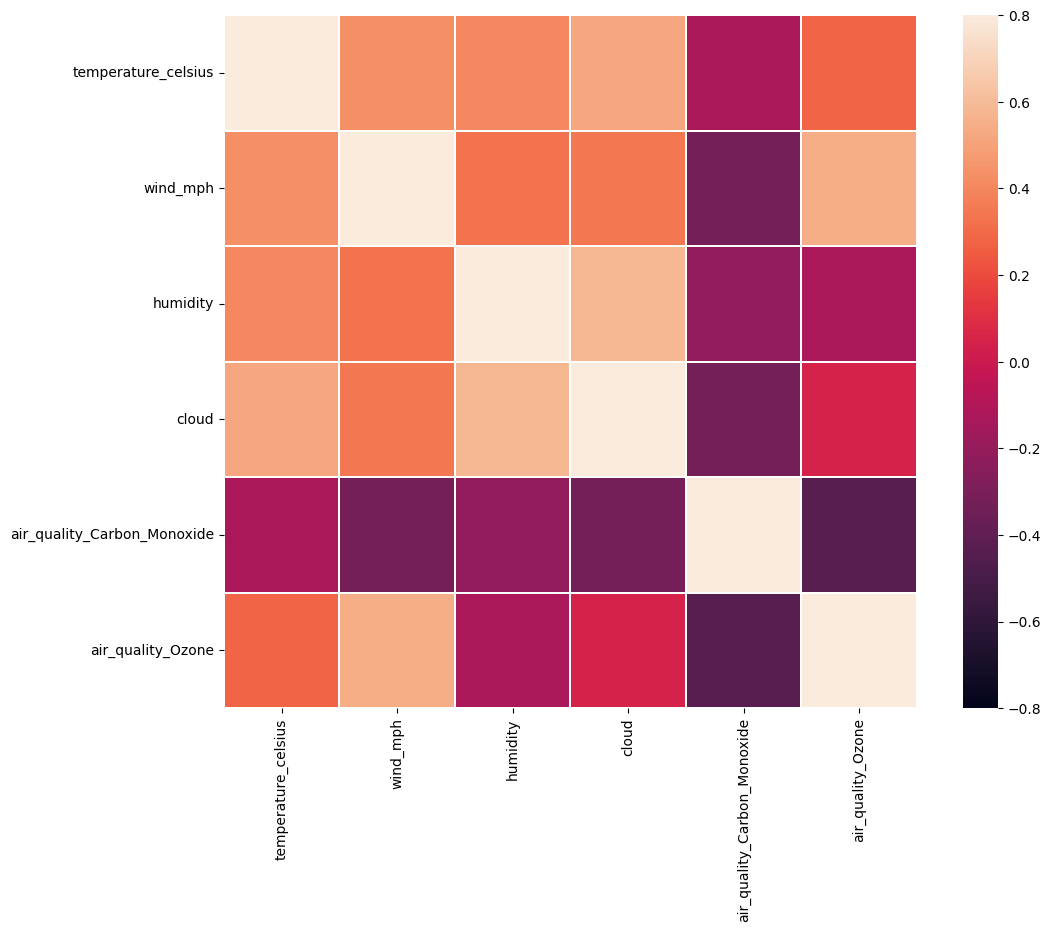

In [ ]:
corr_train = X_test.corr()
f, ax = plt.subplots(figsize=(12, 9))
# Mask the upper part of the heatmap
# mask = np.triu(np.ones_like(corr_train, dtype = bool))
sns.heatmap(corr_train, vmax = .8, vmin = -.8, linewidths = 0.1,
            annot_kws = {"size": 10, "color": "black"}, square = True)

In [ ]:
# All the number columns
train_num = X_train.select_dtypes(include = [np.number])
test_num = X_test.select_dtypes(include = [np.number])

train_num.head()

,temperature_celsius,wind_mph,humidity,cloud,air_quality_Carbon_Monoxide,air_quality_Ozone
84,-0.289626,-1.082365,-0.065779,-0.731993,2.404742,-0.854139
95,-0.989514,-0.147501,1.611957,2.532730,-1.012924,0.874905
137,-1.204864,-0.745814,-0.537643,1.716549,3.426362,-0.863311
211,1.433175,2.507514,0.458513,-0.731993,0.872267,0.466722
86,-0.289626,-1.007576,0.091508,-0.699346,-0.380459,-0.844966


#Numerical Data analyze

In [ ]:
# All the number columns
train_num = X_train.select_dtypes(include = [np.number])
test_num = X_test.select_dtypes(include = [np.number])

train_num.head()

,temperature_celsius,wind_mph,humidity,cloud,air_quality_Carbon_Monoxide,air_quality_Ozone
84,-0.29,-1.08,-0.07,-0.73,2.40,-0.85
95,-0.99,-0.15,1.61,2.53,-1.01,0.87
137,-1.20,-0.75,-0.54,1.72,3.43,-0.86
211,1.43,2.51,0.46,-0.73,0.87,0.47
86,-0.29,-1.01,0.09,-0.70,-0.38,-0.84


In [ ]:
train_numeric = [col for col in X_train.columns if X_train[col].dtypes != 'object']
print("Numeric Features:", train_numeric)
print(f"\nTotal Numeric Features: {len(train_numeric)}")

Numeric Features: ['temperature_celsius', 'wind_mph', 'humidity', 'cloud', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone']

Total Numeric Features: 6


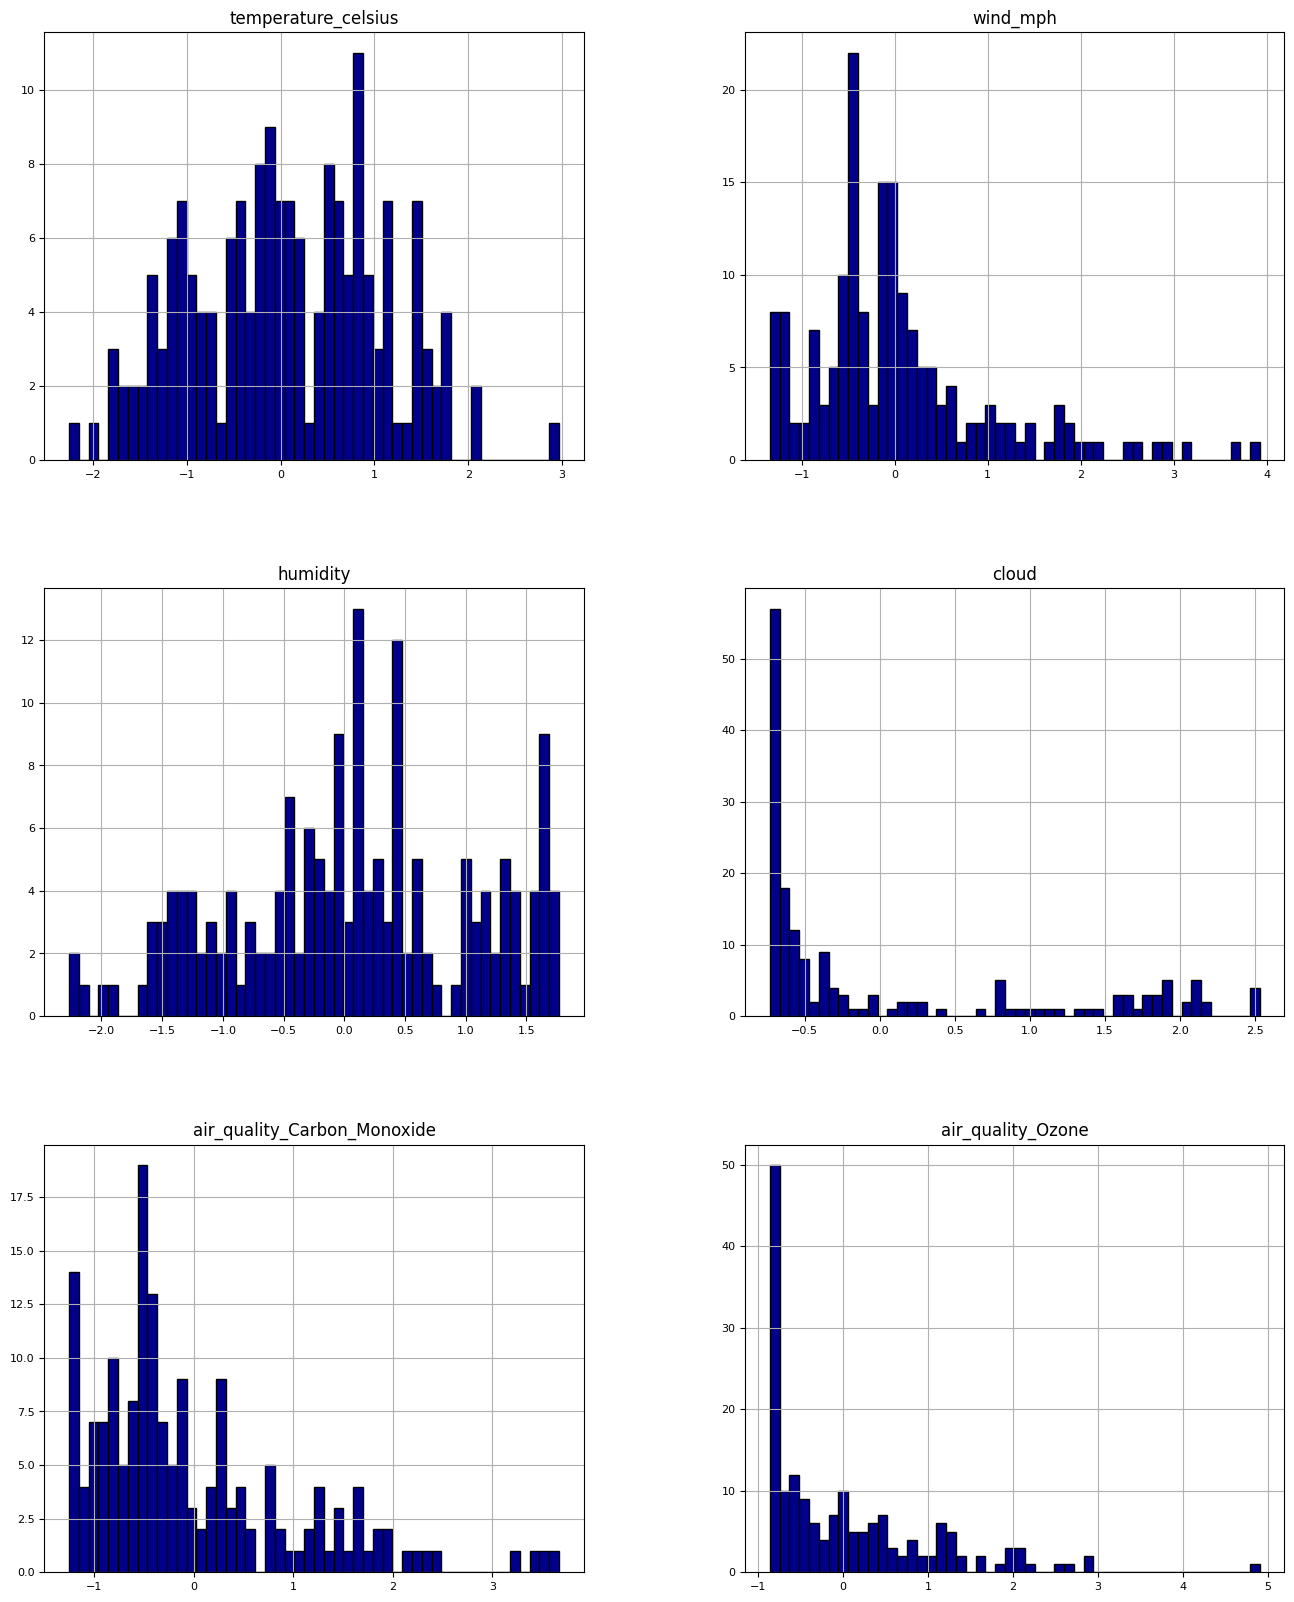

In [ ]:
# Plot the distribution of all the numerical features
fig_ = train_num.hist(figsize = (16, 20), bins = 50, color = "darkblue",
                           edgecolor = "black", xlabelsize = 8, ylabelsize = 8)

For test data


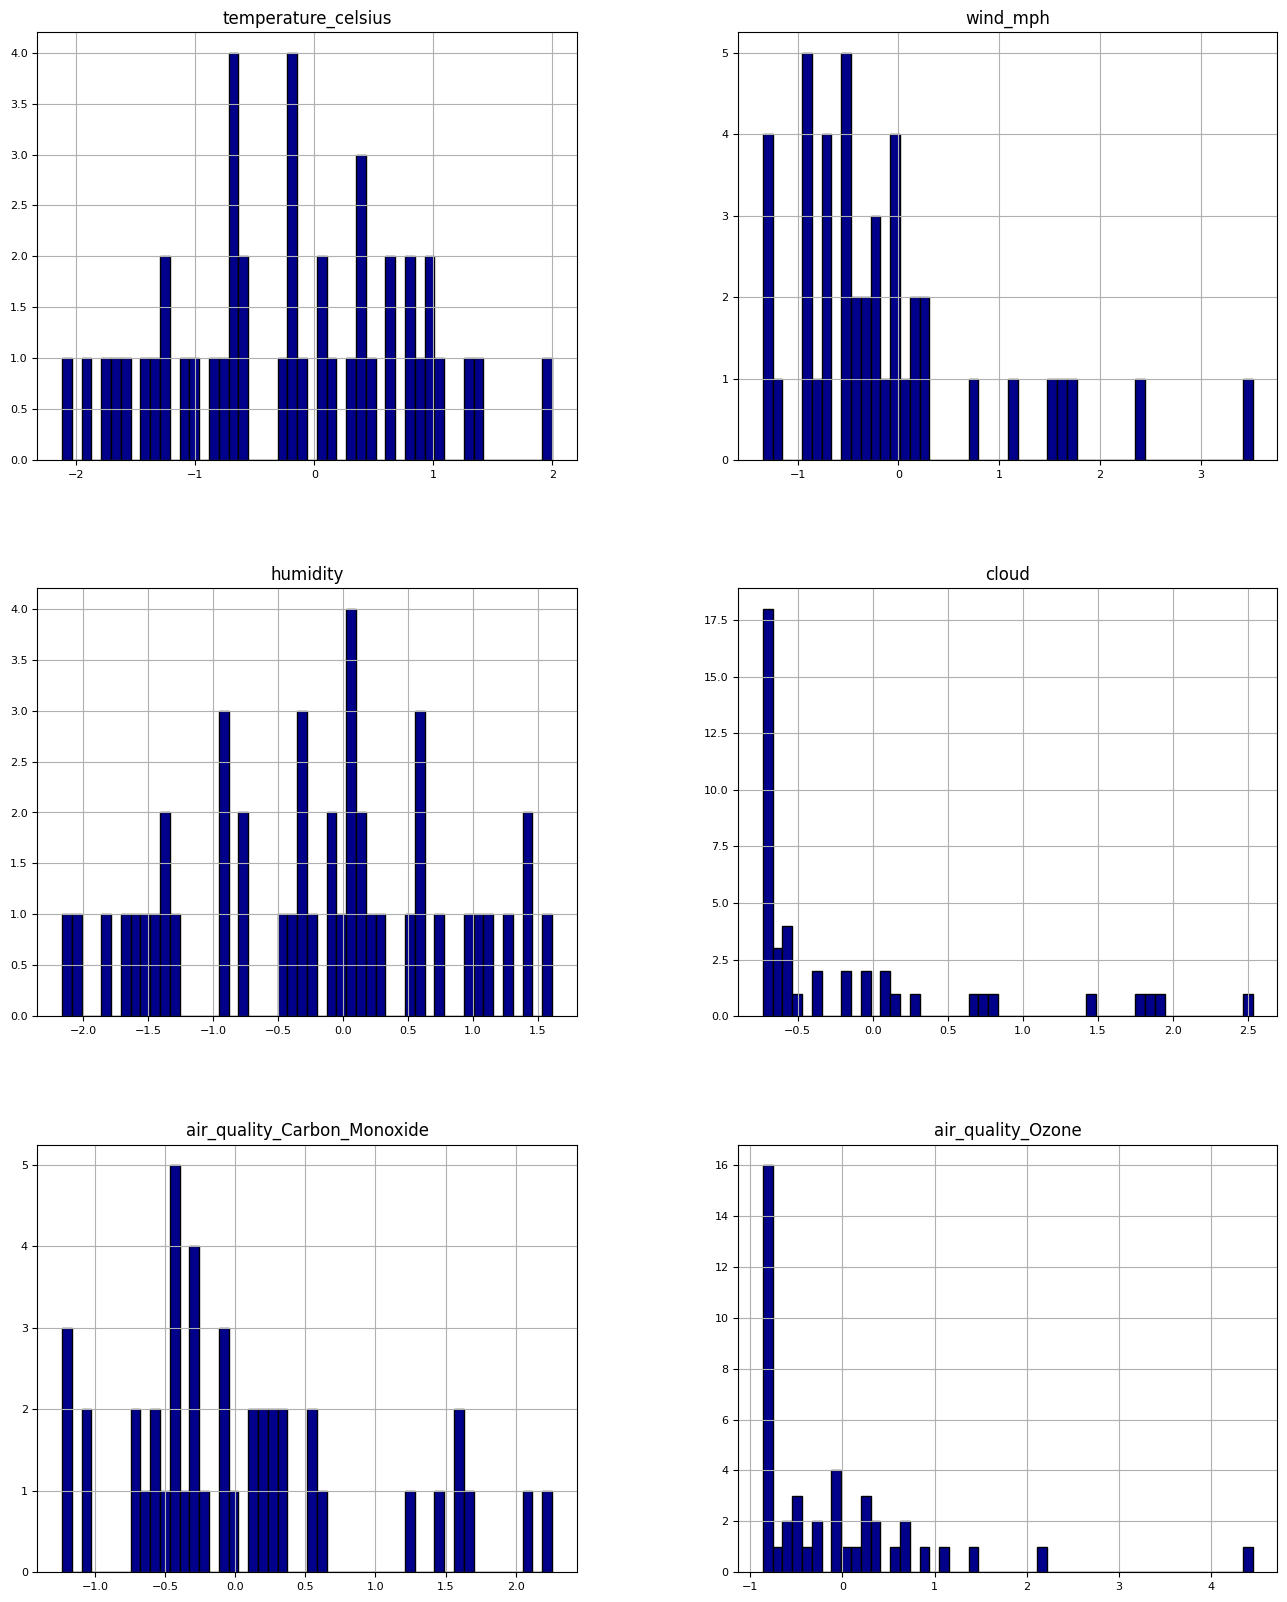

In [ ]:
fig_ = test_num.hist(figsize = (16, 20), bins = 50, color = "darkblue",
                           edgecolor = "black", xlabelsize = 8, ylabelsize = 8)

### Heatmap for remaining numerical data
For now, will neglect the low correlation as those will not have a huge impact on the final result. So, replacing those values with 0s.

<Axes: >

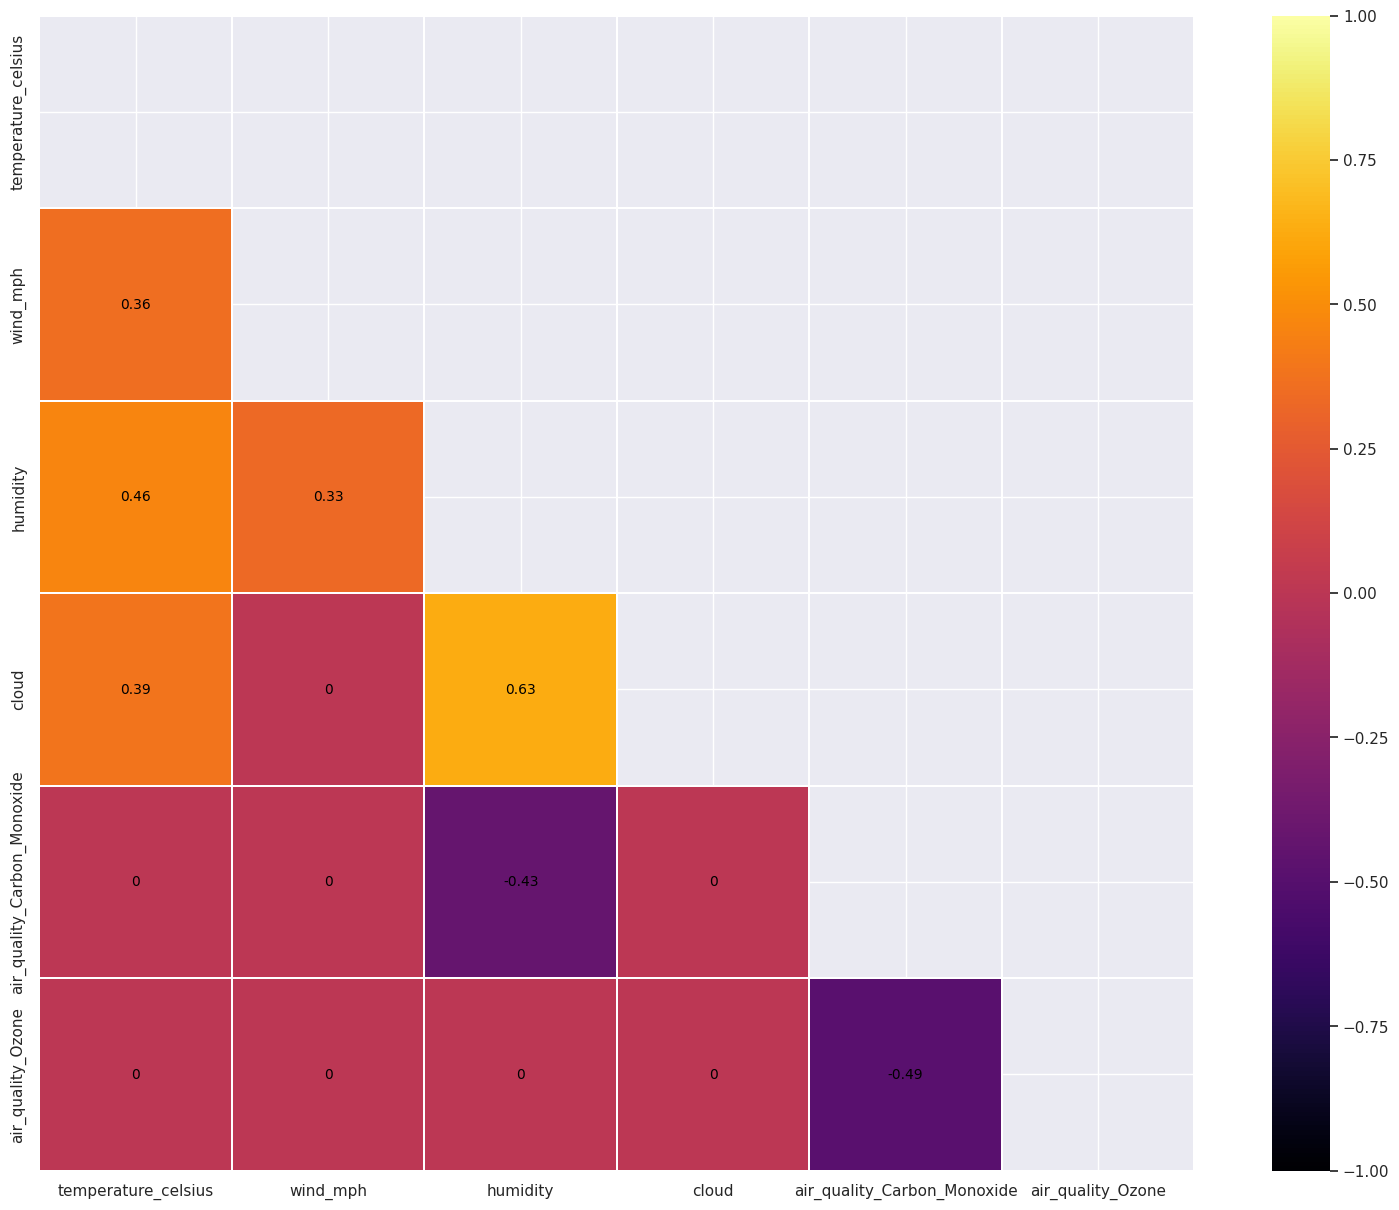

In [ ]:
corr_matrix = train_num.corr()
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0


# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

cmap = "inferno"

# plot the heatmap
sns.set(rc = {'figure.figsize':(20, 15)})
sns.heatmap(corr_matrix, mask = mask, vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot_kws = {"size": 10, "color": "black"}, square = True, cmap = cmap, annot = True)

In [ ]:
print(X_test.head())

     temperature_celsius  wind_mph  humidity     cloud  \
201             0.060318 -0.671025 -0.327926 -0.340227   
213             1.998468  3.517167 -0.065779 -0.568757   
138            -1.581726 -0.072712 -0.904647 -0.731993   
177            -0.262707 -1.344127 -1.638657 -0.601404   
15              1.002474  1.161309  1.402240  0.737132   

     air_quality_Carbon_Monoxide  air_quality_Ozone  
201                     1.577699          -0.849552  
213                    -0.635886           4.452235  
138                    -0.270963          -0.757826  
177                     0.361411          -0.799103  
15                     -1.043350          -0.395507  


In [ ]:
pca = PCA(n_components=3)


X_train_pca = pca.fit_transform(X_train)


X_test_pca = pca.transform(X_test)


X_train_pca_df = pd.DataFrame(X_train_pca, columns=['Feature 1', 'Feature 2','Feature 3'])  # Replace 'PCA1', 'PCA2' with appropriate column names

print(X_train_pca_df.head())

   Feature 1  Feature 2  Feature 3
0  -2.161047  -1.435659   0.354208
1   2.077607  -0.118637  -2.006210
2  -1.968208  -2.585446  -0.048235
3   1.008027  -0.024784   2.904430
4  -0.887848  -0.151773  -0.882070


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

linear_reg = LinearRegression()


linear_reg.fit(X_train, y_train)


y_pred = linear_reg.predict(X_test)


r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared*100)


R-squared: 74.77926714766411


<ipython-input-65-717b6610d574>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


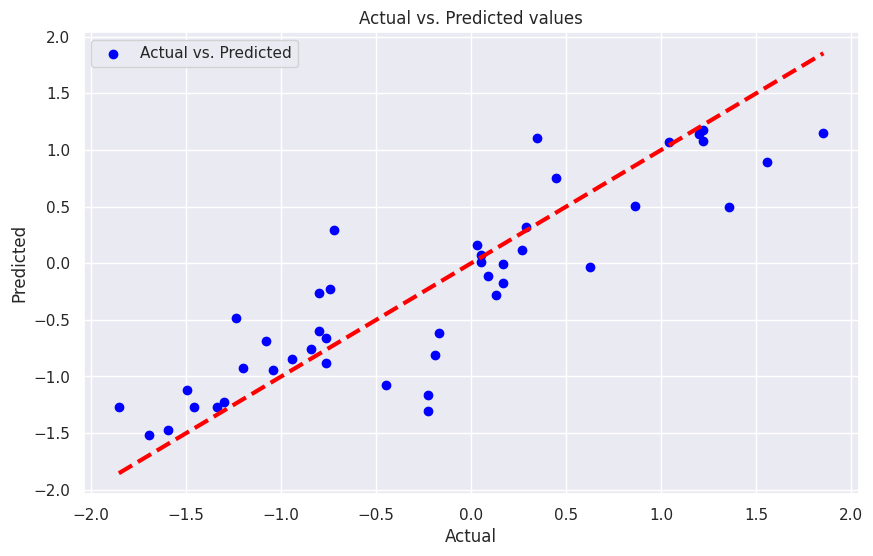

In [ ]:


# Plotting actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'air_quality_Carbon_Monoxide','air_quality_Ozone','air_quality_Nitrogen_dioxide','air_quality_Sulphur_dioxide','air_quality_PM2.5','gust_mph','air_quality_us-epa-index','air_quality_gb-defra-index'

('air_quality_Carbon_Monoxide',
 'air_quality_Ozone',
 'air_quality_Nitrogen_dioxide',
 'air_quality_Sulphur_dioxide',
 'air_quality_PM2.5',
 'gust_mph',
 'air_quality_us-epa-index',
 'air_quality_gb-defra-index')

Support Vector Machine

R-squared: 76.5426801302396


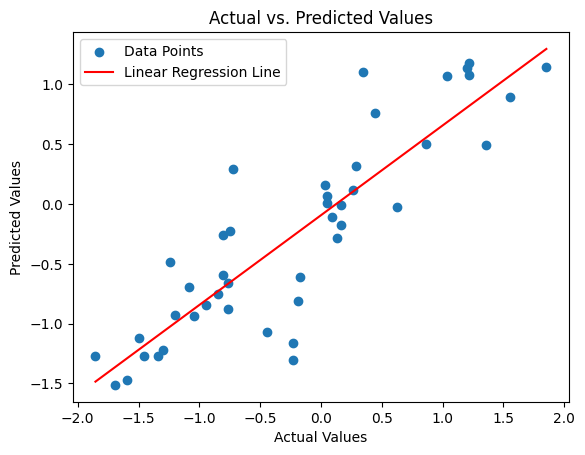

In [ ]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
# Create an SVR regressor
regressor = svm.SVR()

# Train the regressor on the training data
regressor.fit(X_train_pca, y_train)

# Predict the values for the testing data
y_pred = regressor.predict(X_test_pca)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared*100)

# Plot actual versus predicted values
plt.scatter(y_test, y_pred, label='Data Points')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Fit a linear regression line
coefficients = np.polyfit(y_test, y_pred, 1)
x_values = np.linspace(min(y_test), max(y_test), 100)
y_values = np.polyval(coefficients, x_values)
plt.plot(x_values, y_values, color='red', label='Linear Regression Line')

plt.legend()
plt.show()
